# Local Search

For some problems, the path from the initial state to the solution is not that important. What matters is the goal state! For such problems, we may be able to do better that the systematic state-space exploration of the *classical* search algorithms. Local search algorithms try to take advantage of that and that enables them to achieve VERY low (sometimes constant) memory requirements for even the biggest problems!

###This notbook is for implementing both Hill Climbing Algorithm and Simulated Annealing in Python

Simulated annealing and hill climbing are both optimization algorithms, but they have some key differences in their approaches.

Hill Climbing:
- Hill climbing is a local search algorithm that starts from an initial solution and iteratively makes small adjustments to improve the solution.
- The algorithm explores the neighboring solutions and selects the best one that improves the objective function value.
- If the best neighbor has a better objective function value than the current solution, the algorithm moves to that neighbor and continues the search from there.
- Hill climbing terminates when it reaches a local maximum, where no neighboring solution has a better objective function value, and it gets stuck in that local optimum.
- Hill climbing does not consider worse solutions and does not have a probabilistic acceptance criterion.

Simulated Annealing:
- Simulated annealing is a global optimization algorithm inspired by the annealing process in metallurgy.
- It starts from an initial solution and iteratively explores neighboring solutions, similar to hill climbing.
- However, simulated annealing also allows for accepting worse solutions in order to escape local optima and explore the search space more extensively.
- The algorithm uses a temperature parameter that controls the probability of accepting worse solutions. As the temperature decreases, the acceptance probability decreases, and the algorithm becomes more selective.
- Initially, it accepts worse solutions more frequently to explore the search space broadly, but as the temperature decreases, it becomes more focused on improving the objective function value.
- Simulated annealing gradually reduces the temperature over time according to a cooling schedule, which determines the rate at which the algorithm explores and intensifies the search.
- The algorithm terminates when the temperature becomes sufficiently low or after a fixed number of iterations.

In summary, hill climbing focuses on finding the best solution in the local neighborhood, while simulated annealing allows for escaping local optima and exploring a broader search space by accepting worse solutions probabilistically. Simulated annealing is more suitable for global optimization problems where finding the global optimum is desired, while hill climbing tends to find local optima more efficiently.


### A step-by-step tutorial on how to make Hill Climbing solve the Travelling salesman problem

Hill climbing is a mathematical optimization algorithm, which means its purpose is to find the best solution to a problem which has a (large) number of possible solutions. Explaining the algorithm (and optimization in general) is best done using an example. In the Travelling salesman problem, we have a salesman who needs to visit a number of cities exactly once, after which he returns to the first city. The distances between each pair of cities are known, and we need to find the shortest route. As you can imagine, there is (often) a large number of possible solutions (routes) to a specific Travelling salesman problem; the goal is to find the best (i.e. the shortest) solution

Hill climbing tries to find the best solution to this problem by starting out with a random solution, and then generate neighbours: solutions that only slightly differ from the current one. If the best of those neighbours is better (i.e. shorter) than the current one, it replaces the current solution with this better solution. It then repeats the pattern by again creating neighbours. If at some point no neighbour is better than the current solution, it returns the then current solution. That’s it!

In [1]:
import random
import numpy as np
import networkx as nx

In [2]:
#coordinate of the points/cities
coordinate = np.array([[1,2], [30,21], [56,23], [8,18], [20,50], [3,4], [11,6], [6,7], [15,20], [10,9], [12,12]])

#adjacency matrix for a weighted graph based on the given coordinates
def generate_matrix(coordinate):
    matrix = []
    for i in range(len(coordinate)):
        for j in range(len(coordinate)) :
            p = np.linalg.norm(coordinate[i] - coordinate[j]) #returns one of eight different matrix norms
            matrix.append(p)
    matrix = np.reshape(matrix, (len(coordinate),len(coordinate)))
    #print(matrix)
    return matrix

#finds a random solution
def solution(matrix):
    points = list(range(0, len(matrix)))
    solution = []
    for i in range(0, len(matrix)):
        random_point = points[random.randint(0, len(points) - 1)]
        solution.append(random_point)
        points.remove(random_point)
    return solution


#calculate the path based on the random solution
def path_length(matrix, solution):
    cycle_length = 0
    for i in range(0, len(solution)):
        cycle_length += matrix[solution[i]][solution[i - 1]]
    return cycle_length

#generate neighbors of the random solution by swapping cities and returns the best neighbor
def neighbors(matrix, solution):
    neighbors = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbor = solution.copy()
            neighbor[i] = solution[j]
            neighbor[j] = solution[i]
            neighbors.append(neighbor)

    #assume that the first neighbor in the list is the best neighbor
    best_neighbor = neighbors[0]
    best_path = path_length(matrix, best_neighbor)

    #check if there is a better neighbor
    for neighbor in neighbors:
        current_path = path_length(matrix, neighbor)
        if current_path < best_path:
            best_path = current_path
            best_neighbor = neighbor
    return best_neighbor, best_path


def hill_climbing(coordinate):
    matrix = generate_matrix(coordinate)

    current_solution = solution(matrix)
    current_path = path_length(matrix, current_solution)
    neighbor = neighbors(matrix,current_solution)[0]
    best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)

    while best_neighbor_path < current_path:
        current_solution = best_neighbor
        current_path = best_neighbor_path
        neighbor = neighbors(matrix, current_solution)[0]
        best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)

    return current_path, current_solution
final_solution = hill_climbing(coordinate)
print("The solution is \n", final_solution[1])

The solution is 
 [1, 8, 10, 9, 6, 0, 5, 7, 3, 4, 2]


a solution to the Travelling salesman problem could simply be a list of identifiers of all cities, in the order the salesman should visit them. Each city has to be visited exactly once.

Since every city can only be visited one, after its identifier is added to our solution we then remove that city’s identifier from the city identifier list. Our function needs the Travelling salesman problem itself for information about the distances between cities. See the code below (note that you will need to import random for this to work):

In [3]:
def randomSolution(tsp):
    cities = list(range(len(tsp)))
    solution = []

    for i in range(len(tsp)):
        randomCity = cities[random.randint(0, len(cities) - 1)]
        solution.append(randomCity)
        cities.remove(randomCity)

    return solution

we need a function calculating the length of a specific solution. This function needs the Travelling salesman problem itself (for information about the distances between cities) and of course the solution of which we need the route length. Since a solution is a list of all cities in a specific order, we can just iterate over a solution and use the tsp argument to add the distance to each new city to our total route length. The iterator i “visits” each city, so i-1 is “at” the previous city or the last city when i equals 0 (which is exactly what we want, since we want to end up at the first city again). solution[i] thus gives us the current city, and solution[i-1] gives us the previous one. Then we simply use the tsp to get the distance between these cities, which we add to the total length of the route (routeLength).

In [4]:
def routeLength(tsp, solution):
    routeLength = 0
    for i in range(len(solution)):
        routeLength += tsp[solution[i - 1]][solution[i]]
    return routeLength

Hill climbing works in part by generating all neighbouring solutions to the current solution. Let’s create a function doing exactly that. A neighbouring solution is a solution that’s only slightly different from the current solution. Note also that a neighbour still needs to be a correct solution: every city still needs to be visited exactly once. We can accomplish both by creating a neighbour as follows: copy the current solution, and then make two cities swap places! This way, we create a slightly different solution that’s still correct. Since we want to create all neighbours to a solution, and need to make cities swap places, we need to create two for loops, one nested in the other, both iterating the current solution. Since swapping city A with city B is the same as swapping city B with city A, our second loop needs to only loop over those cities the first loop hasn’t looped over yet. Inside the second loop, we create our neighbour with the swapped cities and add it to our neighbours list.

In [5]:
def getNeighbours(solution):
    neighbours = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbour = solution.copy()
            neighbour[i] = solution[j]
            neighbour[j] = solution[i]
            neighbours.append(neighbour)
    return neighbours


### Create a function finding the best neighbour
Now that we have a function generating all neighbours to a solution, it’s time we create one finding the best of these neighbours. This is a pretty straightforward function: it first sets the bestNeighbour to the first neighbour in the list of neighbours (and bestRouteLength to its route length), and then iterates over all neighbours; when a neighbour has a shorter route length, both bestNeighbour and bestRouteLength are updated. This way, the best neighbour is found:

In [6]:
def getBestNeighbour(tsp, neighbours):
    bestRouteLength = routeLength(tsp, neighbours[0])
    bestNeighbour = neighbours[0]
    for neighbour in neighbours:
        currentRouteLength = routeLength(tsp, neighbour)
        if currentRouteLength < bestRouteLength:
            bestRouteLength = currentRouteLength
            bestNeighbour = neighbour
    return bestNeighbour, bestRouteLength

### It’s time for the core function! After creating the previous functions, this step has become quite easy:

First, we make a random solution and calculate its route length. We then create the neighbouring solutions, and find the best one. From there on, as long as the best neighbour is better than the current solution, we repeat the same pattern with the current solution each time being updated with the best neighbour. When this process stops, we return the current solution (and its route length).

In [7]:
def hillClimbing(tsp):
    currentSolution = randomSolution(tsp)
    currentRouteLength = routeLength(tsp, currentSolution)
    neighbours = getNeighbours(currentSolution)
    bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours)

    while bestNeighbourRouteLength < currentRouteLength:
        currentSolution = bestNeighbour
        currentRouteLength = bestNeighbourRouteLength
        neighbours = getNeighbours(currentSolution)
        bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours)

    return currentSolution, currentRouteLength


In [8]:
def main():
    tsp = [
        [0, 400, 500, 300],
        [400, 0, 300, 500],
        [500, 300, 0, 400],
        [300, 500, 400, 0]
    ]

    print(hillClimbing(tsp))

if __name__ == "__main__":
    main()

([1, 2, 3, 0], 1400)


In [9]:
def problemGenerator(nCities):
    tsp = []
    for i in range(nCities):
        distances = []
        for j in range(nCities):
            if j == i:
                distances.append(0)
            elif j < i:
                distances.append(tsp[j][i])
            else:
                distances.append(random.randint(10, 1000))
        tsp.append(distances)
    return tsp

In [13]:
def main():
    tsp = problemGenerator(10)
    for i in range(10):
        print(hillClimbing(tsp))
main()

([8, 9, 1, 3, 6, 0, 2, 5, 4, 7], 2535)
([9, 6, 1, 3, 8, 0, 2, 5, 4, 7], 2497)
([8, 0, 2, 5, 4, 7, 9, 6, 1, 3], 2497)
([0, 2, 5, 4, 7, 9, 8, 3, 1, 6], 2481)
([1, 6, 9, 7, 4, 5, 2, 0, 8, 3], 2497)
([7, 4, 5, 2, 0, 8, 3, 1, 6, 9], 2497)
([1, 3, 8, 9, 7, 4, 5, 2, 0, 6], 2481)
([2, 0, 7, 9, 6, 1, 3, 8, 4, 5], 2502)
([8, 9, 1, 3, 6, 0, 2, 5, 4, 7], 2535)
([8, 4, 6, 3, 1, 9, 7, 0, 2, 5], 2713)


### Simuated Annealing Algorithm

In simple terms, ‘Annealing’ is a technique, where a metal is heated to a high temperature and slowly cooled down to improve its physical properties. When the metal is hot, the molecules randomly re-arrange themselves at a rapid pace.

As the metal starts to cool down, the re-arranging process occurs at a much slower rate. In the end, the resultant metal will be a desired workable metal. The factors of time and metal’s energy at a particular time will supervise the entire process.

In [14]:
from numpy import asarray, exp
from numpy.random import randn, rand, seed
from matplotlib import pyplot

In [15]:
# Objective function is the square of steps taken
def objective(step):
  return step[0] ** 2

The below code cell gives us a random start point between the range of the area of the search space. Let’s also see the evaluation of this start_point.

In [16]:
seed(1)
area = asarray([[-6.0, 6.0]])

# area[:,0] = -6.0, area[:,1] = 6.0, ran(len(area))generates random number within the length of area.
# length of interval is 1.

start_point = area[:, 0] + rand( len( area ) ) * ( area[:, 1] - area[:, 0] )
print(start_point)
print('start_point=', start_point)
print('objective function evaluation of start point=',objective(start_point))

[-0.99573594]
start_point= [-0.99573594]
objective function evaluation of start point= 0.9914900693154707


In [21]:
# Define simulated annealing algorithm
def simulated_annealing(objective, area, iterations, step_size, temperature):
    # create initial point
    start_point = area[:, 0] + rand( len( area ) ) * ( area[:, 1] - area[:, 0] )
    # evaluate initial point
    start_point_eval = objective(start_point)
    # Assign previous and new solution to previous and new_point_eval variable
    # Storing the start point and its objective function evaluation into mia_start_point and mia_start_eval.
    mia_start_point, mia_start_eval = start_point, start_point_eval
    # this empty list will get updated over time once looping starts.
    outputs = []
    # Looping from 0 to the iteration number we specify
    for i in range(iterations):
        # First step by mia this means the steps taken will be 3 * step_size of the current point.
        '''This new point obtained must be checked whether it is better than the current point,
        if it is better, then replace the current point with the new point.
         Then append those new points into our outputs list. If the new point is better:
        '''
        mia_step = mia_start_point + randn( len( area ) ) * step_size
        mia_step_eval = objective(mia_step)
        ''' The new step is checked whether it is better than current step.
         If better, the current point is replaced with new point.
         '''
        if mia_step_eval < start_point_eval:
            start_point, start_point_eval = mia_step, mia_step_eval
      #Append the new values into the output list
            outputs.append(start_point_eval)
            print('Acceptance Criteria = %.5f' % mac," ",'iteration Number = ',i," ", 'best_so_far = ',start_point," "
             ,'new_best = %.5f' % start_point_eval)
        '''
        difference gives us the difference between the old point and the new point
        so that the acceptance probability/metropolis acceptance criterion can be calculated.
         This helps in calculating the probability of accepting a point
         with worse performance than the current point.

         temperature = initial_temperature / (iteration_number + 1)

        '''
        difference = mia_step_eval - mia_start_eval
        t = temperature / float(i + 1)
        # calculate Metropolis Acceptance Criterion / Acceptance Probability
        mac = exp(-difference / t)
        '''
        Then a random number is generated using rand()
        and if the Random Number > Acceptance Probability then the new point will be Rejected
        and if Random Number < Acceptance Probability then the new point will be Accepted.
        '''
        # check whether the new point is acceptable
        if difference < 0 or rand() < mac:
            mia_start_point, mia_start_eval = mia_step, mia_step_eval
    # the returened of the function simulated_annealing
    return [start_point, start_point_eval, outputs]


Acceptance Criteria = 0.76232   iteration Number =  37   best_so_far =  [-0.95340594]   new_best = 0.90898
Acceptance Criteria = 0.87733   iteration Number =  39   best_so_far =  [-0.91563305]   new_best = 0.83838
Acceptance Criteria = 1.44710   iteration Number =  40   best_so_far =  [-0.85680363]   new_best = 0.73411
Acceptance Criteria = 1.42798   iteration Number =  41   best_so_far =  [-0.8221177]   new_best = 0.67588
Acceptance Criteria = 1.22608   iteration Number =  42   best_so_far =  [-0.68541443]   new_best = 0.46979
Acceptance Criteria = 2.09273   iteration Number =  43   best_so_far =  [-0.61804282]   new_best = 0.38198
Acceptance Criteria = 1.16478   iteration Number =  50   best_so_far =  [-0.42564785]   new_best = 0.18118
Acceptance Criteria = 0.81414   iteration Number =  66   best_so_far =  [-0.35632231]   new_best = 0.12697
Acceptance Criteria = 1.74595   iteration Number =  67   best_so_far =  [-0.33780667]   new_best = 0.11411
Acceptance Criteria = 1.02155   iterat

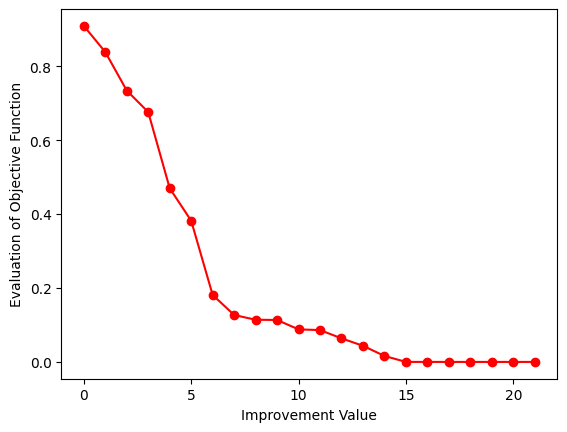

In [19]:
seed(1)
# define the area of the search space
area = asarray([[-6.0, 6.0]])
# initial temperature
temperature = 12
# define the total no. of iterations
iterations = 1200
# define maximum step_size
step_size = 0.1
# perform the simulated annealing search
start_point, output, outputs = simulated_annealing(objective, area, iterations, step_size, temperature)
#plotting the values
pyplot.plot(outputs, 'ro-')
pyplot.xlabel('Improvement Value')
pyplot.ylabel('Evaluation of Objective Function')
pyplot.show()